# What is Outlier?
      
      Outlier is an observation that appears far away and diverges from an overall pattern in a sample.
      Let’s take an example, we do customer profiling and find out that the average annual income of customers is $0.8 million. But, there are two customers having annual income of $4 and $4.2 million. These two customers annual income is much higher than rest of the population. These two observations will be seen as Outliers.



# What are the types of Outliers?
                 
                 Outlier can be of two types: Univariate and Multivariate. These outliers can be found when we look at distribution of a single variable. Multi-variate outliers are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions.
  

# What causes for Outliers?
 
             Causes of outliers can be classified in two broad categories:

1) Artificial (Error) / Non-natural
2) Natural.

Causes:

1) Data Entry errors.
2) Measurment Errors.
3) Experimental Errors.
4) Intentional Errors.
5) Data Processing Errors.
6) Sampling Errors.
7) Natural Errors.

# What is the impact of Outliers on a dataset?

There are numerous unfavourable impacts of outliers in the data set:

1) It increases the error variance and reduces the power of statistical tests

2) If the outliers are non-randomly distributed, they can decrease normality

3) They can bias or influence estimates that may be of substantive interest

4) They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.

# How to detect Outliers?
 
 Most commonly used method to detect outliers is visualization. We use various visualization methods, like Box-plot, Histogram, Scatter Plot. Some analysts also various thumb rules to detect outliers. Some of them are:

1) Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR

2) Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier

3) Data points, three or more standard deviation away from mean are considered outlier

4) Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding

5) Bivariate and multivariate outliers are typically measured using either an index of influence or leverage, or distance. Popular indices such as Mahalanobis’ distance and Cook’s D are frequently used to detect outliers.

# Detecting Outlier using Z-Score

Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

In [1]:
#Step 1: importing  libraries

import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
#Step 2: Calculate mean, standard deviation

data= [1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, 1, 1, 2]
mean = np.mean(data)
standardDeviation = np.std(data)
print("Mean of dataset", mean)
print("Standard Deviation of dataset", standardDeviation)

Mean of dataset 2.6666666666666665
Standard Deviation of dataset 3.3598941782277745


In [3]:
#Step 3: Calculate Z Score, if Z Score is greater then 3, then it will be outlier
# Here, 3 is a threshold value 
outliers = []
def detectOutliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z = (i - mean)/std
        if np.abs(z) > threshold:
            outliers.append(i)
    return outliers
#print("Outlier in dataset", outlier)

In [4]:
output= detectOutliers(data)
print("Outlier in dataset: ", output)

Outlier in dataset:  [15]


# Using IQR (InterQuantile Range) Score

75%- 25% in dataset

Step1 : Sort the dataset in increasing order

Step2:  Calculate first(q1) and third quartile(q3)

Step3: Find interquartile range (q3-q1)

Step4.Find lower bound q1*1.5

Step5.Find upper bound q3*1.5

Anything that lies outside of lower and upper bound is an outlier

In [5]:
dataset=  [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

In [6]:
#Step1: Sort the dataset
sorted(dataset)

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [7]:
#Step2: First quantile and Third Quantile
quantile1, quantile3 = np.percentile(dataset,[25, 75])
print(quantile1)
print(quantile3)

12.0
15.0


In [8]:
#Step3: Finding inquantile range
iqr = quantile3- quantile1
print(iqr)

3.0


In [9]:
#Step4: Find lower bound q1*1.5, higher bound q3*1.5

lower_bound = quantile1 - (1.5 * iqr)
higher_bound = quantile3 + (1.5 * iqr)

print(lower_bound)
print(higher_bound)

7.5
19.5


# How to remove Outliers?

Most of the ways to deal with outliers are similar to the methods of missing values like deleting observations, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods.

# Now Practice on large dataset "boston house pricing" dataset

In [10]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [11]:
dataset = load_boston()                     #assign loaded dataset into a variable
df = pd.DataFrame(dataset.data)             #convert dataset into pandas dataframe
df.info()                                   #finding dataset information
df.head()                                   #show some top of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:

columns = dataset.feature_names          #storing feature names of dataset in variable
df.columns = columns                     #assign those columns name to dataframe column
df.head()                                #show top of the data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Here, we will be look on features or independent variable for finding outlier. because in training dataset ouliers should not be present.And we have only numerical type data so we dont need to do any data formating :)

As we have seen that Outliers are of two type: Univariate (One variable Outlier analysis) and Multivariate(two or more outlier analusis). For Visualizing purpose, we'll use "Box Plot". If there is an outlier it will plotted as point in boxplot but other population will be grouped together and display as boxes.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIS'>

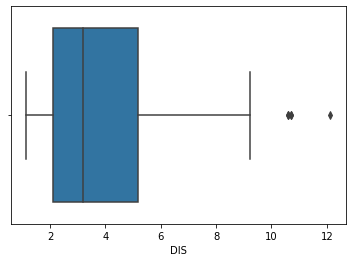

In [13]:
import seaborn as sns           #importin seabon library for Box- plot
sns.boxplot(df['DIS'])          #Analyzing univariate outlier bcoz we have given only one column

According to above plot there are 3 data points which lie between 10 to 12. So, these data points are Outliers as these are not included in box.

We can do Multivariate analysis also using Box- plot, if we have categorical value. then we will use categorical and continous value, but in our dataset there is no categorical value so we can't analize with Box plot.

But we can use Scatter plot:)

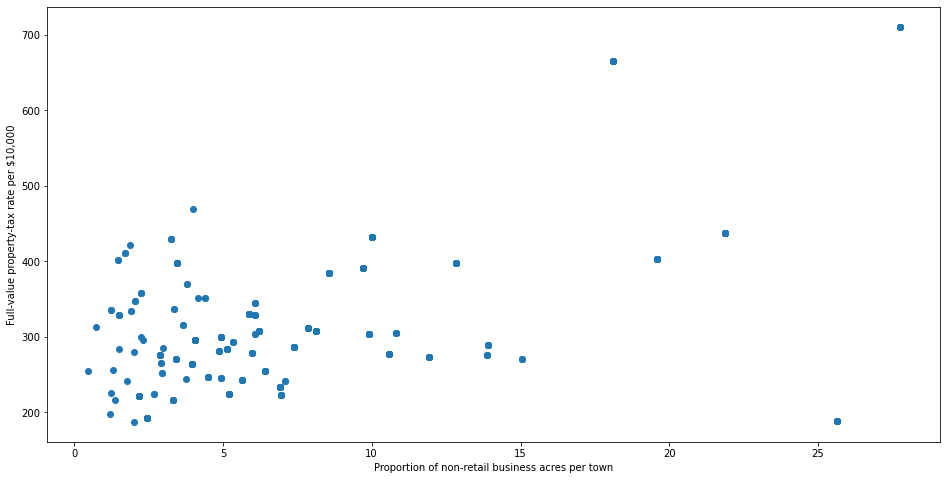

In [14]:
import matplotlib.pyplot as plt             #import matplotlib.pyplot for ploting subplots
fig, ax = plt.subplots(figsize=(16,8))      #Defining figure size
ax.scatter(df['INDUS'],df['TAX'])           #giving column name for which we want to predict outliers, here X axis contains 
                                                #first parameter and second parameter will work for y axis
ax.set_xlabel('Proportion of non-retail business acres per town')  #definr label name
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()                                

As we can see most of the data points are available at left side, but one point is at top right corner.

Now we have visulazid our data next step is to find outlier value, for this we will be using Z score and IQR method.

But the question is how Z score will tell about outliers?

while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [15]:
from scipy import stats                        # we can make function for calculating Zscore as above we made 
                                                  #but in scipy library there is in-built function called "zscore"
z= np.abs(stats.zscore(df))                    #provinding whole dataset
print("All Z score:",z)                                       # print the z value

#Now we are not able to find which z value is outlier, for finding this we apply one condition 

threshold= 3
print("Prining Only Outlier values:", np.where(z>3))        #printing those z value whichever are outside 3rd standard deviation

#In result when we printed only outlier values, so first array list contains all raws number and second array list contains all 
#column numbers. For example first outlier value is: 55th raw and 1st column

print("Oulier value 55th raw and 1st column: ",z[55][1])

All Z score: [[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]
Prining Only Outlier values: (array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       43

# Using IQR Score

In [16]:
sorted(df)

['AGE',
 'B',
 'CHAS',
 'CRIM',
 'DIS',
 'INDUS',
 'LSTAT',
 'NOX',
 'PTRATIO',
 'RAD',
 'RM',
 'TAX',
 'ZN']

In [17]:
q1 = df.quantile(0.25)                      #finding first quantile
q3 = df.quantile(0.75)                      #finding third quantntile
iqr_value = q3 - q1                         #finding iqr value
print("IQR Value: ", iqr_value)             #print the iqr value

IQR Value:  CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [20]:
print((df < (q1 - 1.5 * iqr_value)) | (df > (q3 + 1.5 * iqr_value)))

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  
0      False  False  False  
1      False  Fal

# Removing the outliers 

We will delete those outlier data

First for Zscore:

In [24]:
withoutoutliers_zscore = df[(z< 3).all(axis=1)]
print("Without outlier dataset shape using ZScore: ", withoutoutliers_zscore.shape)

Without outlier dataset shape:  (415, 13)


Now For IQR Score:

In [26]:
df_withoutOutlier_IQR = df[~((df < (q1 - 1.5 * iqr_value)) |(df > (q3 + 1.5 * iqr_value))).any(axis=1)]
print("Without outlier dataset shape using IQR score: ",df_withoutOutlier_IQR.shape )

Without outlier dataset shape using IQR score:  (274, 13)


This is all Outliers.

Hope it will be useful to you all.

Happy Coding :)

Sources :

    Krish Naik git hub repository

   https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
   
   https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/